In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [20]:
# Load dataset
df = pd.read_csv('/home/rguktongole/Downloads/house_price_regression_dataset.csv')
df


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [24]:
# Select relevant features
X = df[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms']]
y = df['House_Price']




In [23]:
# Handle missing values
X = X.copy()
X.fillna(X.mean(), inplace=True)
X


,Square_Footage,Num_Bedrooms,Num_Bathrooms
0,1360,2,1
1,4272,3,3
2,3592,1,2
3,966,1,2
4,4926,2,1
...,...,...,...
995,3261,4,1
996,3179,1,2
997,2606,4,2
998,4723,5,2


In [25]:
y = y.copy()
y.fillna(y.mean(), inplace=True)
y



0      2.623829e+05
1      9.852609e+05
2      7.779774e+05
3      2.296989e+05
4      1.041741e+06
           ...     
995    7.014940e+05
996    6.837232e+05
997    5.720240e+05
998    9.648653e+05
999    7.425993e+05
Name: House_Price, Length: 1000, dtype: float64

Model Coefficients: [  201.16220341 10111.38168614  9342.06021727]
Intercept: 4092.0296718557365
Mean Absolute Error: 23384.98
Root Mean Squared Error: 29092.57
R-squared Score: 0.99


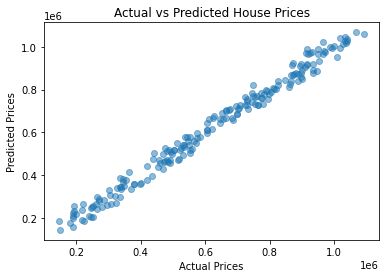

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = model.score(X_test, y_test)

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2_score:.2f}")

# Visualizing actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
